In [ ]:
### YOLO V5 on COCO dataset

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/78.2 GB disk)


In [ ]:
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5x.pt --cache

train: weights=yolov5x.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0

# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

detect: weights=['yolov5x.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
image 1/2 /content/yolov5/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.076s)
image 2/2 /content/yolov5/yolov5/data/images/zidane.jpg: 384x640 3 persons, 2 ties, Done. (0.038s)
Speed: 0.5ms pre-process, 57.1ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


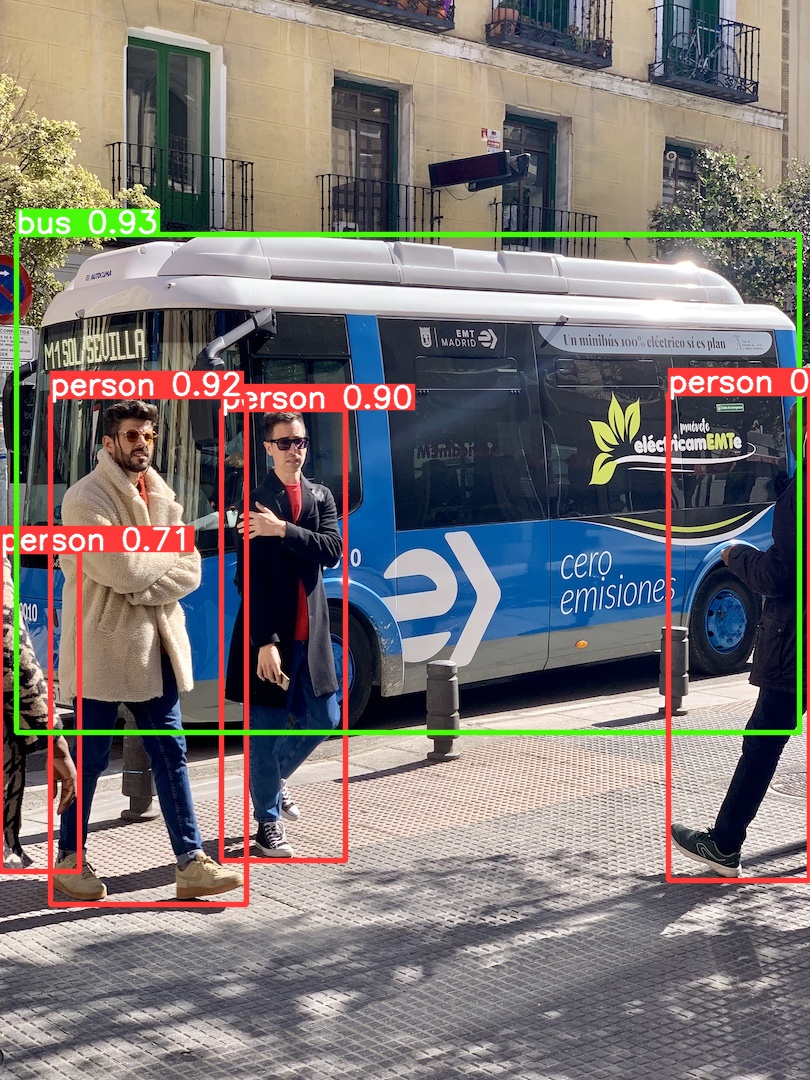

In [ ]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/bus.jpg', width=600)

# 2. Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be ~1% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
!pwd

/content/yolov5/yolov5


In [ ]:
# Run YOLOv5x on COCO val
!python val.py --weights yolov5m.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/yolov5/data/coco.yaml, weights=['yolov5m.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 40.8M/40.8M [00:00<00:00, 180MB/s]

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
val: Scanning '/content/yolov5/datasets/coco/val2017.cache' images and labels... 4952 found, 48 missing, 0 empty, 0 corrupt: 100% 5000/5000 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 157/157 [01:18<00:00,  1.99it/s]
                 all       5000      36335      0.717      0.579      0.635       0.45
Speed: 0.1ms pre-process, 5.4ms inference, 1.7ms NMS per image at shape (32,

In [ ]:
# Run YOLOv5x on custom trained last layer COCO val
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/yolov5/data/coco.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
val: Scanning '/content/yolov5/datasets/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2021.88it/s]
val: New cache created: /content/yolov5/datasets/coco/val2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 157/157 [02:04<00:00,  1.27it/s]
                 all       5000      36335      0.743      0.625      0.683      0.504
Speed: 0.1ms pre-process, 16.5ms inference, 1.